# Scikit-learn

In [1]:
import sklearn

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd

iris = load_iris()
iris_data = iris.data # data consists of only features 

iris_label = iris.target

iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

In [5]:
dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [6]:
pred = dt_clf.predict(X_test)
pred

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

In [7]:
from sklearn.metrics import accuracy_score
print("Accuracy: {0:.4f}".format(accuracy_score(y_test, pred))) 

Accuracy: 0.9333


## k-fold

In [11]:
import matplotlib.pyplot as plt
def plot_data_distribution(train_counts, test_counts, targets, fold):
    # Reindex to ensure all labels are included (fill missing with 0)
    labels = range(len(targets))
    train_counts = train_counts.reindex(labels, fill_value=0)
    test_counts = test_counts.reindex(labels, fill_value=0)
    
    # Plot bar chart
    plt.figure(figsize=(4, 2))
    plt.bar([x - 0.2 for x in labels], train_counts, width=0.4, label='Train', alpha=0.7)
    plt.bar([x + 0.2 for x in labels], test_counts, width=0.4, label='Test', alpha=0.7)
    plt.xticks(labels, iris.target_names)
    plt.title(f'Label Distribution for Fold {fold}')
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

iris = load_iris()
features = iris.data
label = iris.target
# random_state ensures reproducibility by controlling the random seed used in the model's operations.
dt_clf = DecisionTreeClassifier(random_state=156)

kfold = KFold(n_splits=5)
cv_accuracy = []
print('iris data set size: ', features.shape[0])

iris data set size:  150


Cross-validation [1]
Train label data distribution
 label
1    50
2    50
0    20
Name: count, dtype: int64
Test label data distribution
 label
0    30
Name: count, dtype: int64


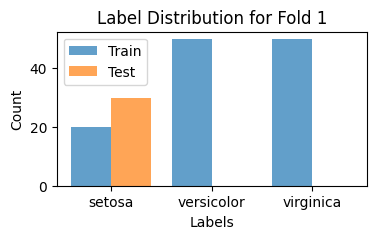


Cross-validation [2]
Train label data distribution
 label
2    50
1    40
0    30
Name: count, dtype: int64
Test label data distribution
 label
0    20
1    10
Name: count, dtype: int64


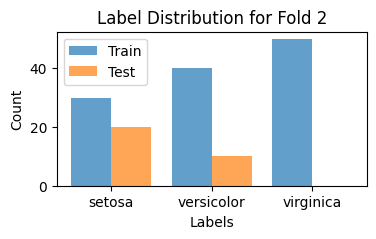


Cross-validation [3]
Train label data distribution
 label
0    50
2    50
1    20
Name: count, dtype: int64
Test label data distribution
 label
1    30
Name: count, dtype: int64


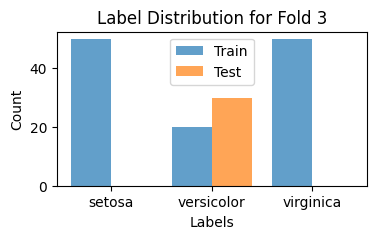


Cross-validation [4]
Train label data distribution
 label
0    50
1    40
2    30
Name: count, dtype: int64
Test label data distribution
 label
2    20
1    10
Name: count, dtype: int64


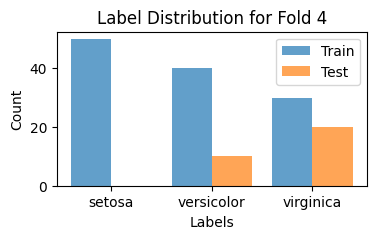


Cross-validation [5]
Train label data distribution
 label
0    50
1    50
2    20
Name: count, dtype: int64
Test label data distribution
 label
2    30
Name: count, dtype: int64


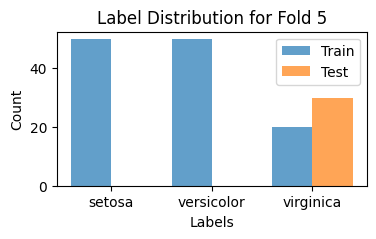

In [16]:
import numpy as np

n_iter = 0
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]

    print(f'Cross-validation [{n_iter}]')
    print('Train label data distribution\n', label_train.value_counts())
    print('Test label data distribution\n', label_test.value_counts())

    # Call the updated function
    plot_data_distribution(label_train.value_counts(), label_test.value_counts(), iris.target_names, n_iter)
    print()

In [17]:
import numpy as np

n_iter = 0

for train_index, test_index in kfold.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]

    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1

    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('[{}] cross_validation_accuracy={}, train_set_size={}, validation_set_size={}'.format(n_iter, accuracy, train_size, test_size))

    cv_accuracy.append(accuracy)

print('average accuracy: ', np.mean(cv_accuracy))
    

[1] cross_validation_accuracy=1.0, train_set_size=120, validation_set_size=30
[2] cross_validation_accuracy=0.9667, train_set_size=120, validation_set_size=30
[3] cross_validation_accuracy=0.8667, train_set_size=120, validation_set_size=30
[4] cross_validation_accuracy=0.9333, train_set_size=120, validation_set_size=30
[5] cross_validation_accuracy=0.7333, train_set_size=120, validation_set_size=30
average accuracy:  0.9


## Stratified K-Fold

In [18]:
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

Cross-validation [1]
Train label data distribution
 label
2    34
0    33
1    33
Name: count, dtype: int64
Test label data distribution
 label
0    17
1    17
2    16
Name: count, dtype: int64


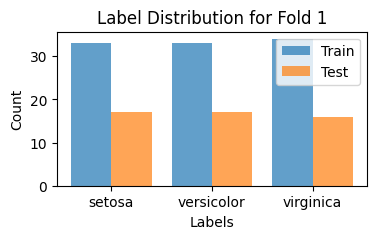


	CV accuracy:  0.98
	Train set size:  100
	Test set size:  50

Cross-validation [2]
Train label data distribution
 label
1    34
0    33
2    33
Name: count, dtype: int64
Test label data distribution
 label
0    17
2    17
1    16
Name: count, dtype: int64


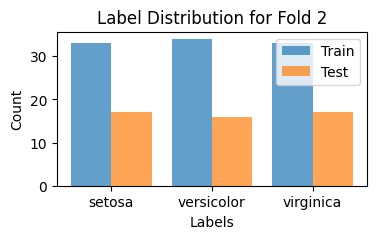


	CV accuracy:  0.94
	Train set size:  100
	Test set size:  50

Cross-validation [3]
Train label data distribution
 label
0    34
1    33
2    33
Name: count, dtype: int64
Test label data distribution
 label
1    17
2    17
0    16
Name: count, dtype: int64


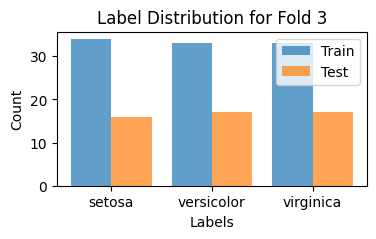


	CV accuracy:  0.98
	Train set size:  100
	Test set size:  50

Average validation accuracy:  0.9666666666666667


In [25]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)

n_iter = 0
cv_accuracy= [] 

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]

    print(f'Cross-validation [{n_iter}]')
    print('Train label data distribution\n', label_train.value_counts())
    print('Test label data distribution\n', label_test.value_counts())

    # Call the updated function
    plot_data_distribution(label_train.value_counts(), label_test.value_counts(), iris.target_names, n_iter)
    print()

    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]

    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)

    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]

    print('\tCV accuracy: ', accuracy)
    print('\tTrain set size: ', train_size)
    print('\tTest set size: ', test_size)
    print()

    cv_accuracy.append(accuracy)

print('Average validation accuracy: ', np.mean(cv_accuracy))


## cross_val_score()

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
import numpy as np

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3) # use stratified k-fold as a default
print(np.round(scores, 4))
print(np.round((np.mean(scores)), 4))

[0.98 0.94 0.98]
0.9667


## GridSearchCV

In [27]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=121)
dt_cls = DecisionTreeClassifier()

parameters = {'max_depth': [1, 2, 3], 'min_samples_split': [2, 3] }


In [29]:
import pandas as pd

# refit=True is default, if true, refit the model with the best params setting
grid_dtree = GridSearchCV(dt_cls, param_grid=parameters, cv=3, refit=True, return_train_score=True)
grid_dtree.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_) # convert output dict to df

print(scores_df.columns)
scores_df[['params', 'mean_test_score', 'rank_test_score',
          'split0_test_score', 'split1_test_score', 'split2_test_score']]


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_split', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [31]:
print('GridSearchCV best params: ', grid_dtree.best_params_)
print('GridSearchCV best accuracy: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV best params:  {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV best accuracy: 0.9750


In [34]:
pred = grid_dtree.predict(X_test) # as we set refit=True, this CV object will use the best trained estimator if we run predict()
print('test set accuracy: {0:.4f}'.format(accuracy_score(y_test, pred)))
# so it's same as below codes
estimator = grid_dtree.best_estimator_
pred_by_estimator = estimator.predict(X_test)
print('test set accuracy: {0:.4f} (by best estimator)'.format(accuracy_score(y_test, pred_by_estimator)))

test set accuracy: 0.9667
test set accuracy: 0.9667 (by best estimator)


##

## 인코딩
- 레이블 인코딩 - 의도치않은 숫자의 대소를 방지하기 위해 원핫인코딩 나왔다
- 원핫 인코딩

### 레이블 인코딩

In [35]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', 'fridge', 'microwave', 'computer', 'cooling fan', 'cooling fan', 'grinder', 'grinder']

encoder = LabelEncoder()
encoder.fit(items) #why need fit? decide how to assign values based on data
labels = encoder.transform(items)
print('converted values: ', labels)

converted values:  [0 3 5 1 2 2 4 4]


In [36]:
print('encoding class: ', encoder.classes_) # original values

encoding class:  ['TV' 'computer' 'cooling fan' 'fridge' 'grinder' 'microwave']


In [38]:
print('inverse transform (encoded value to text value)', encoder.inverse_transform([4, 5, 0]))

inverse transform (encoded value to text value) ['grinder' 'microwave' 'TV']


In [42]:
np.array(items).shape
np.array(items).reshape(-1,1)

array([['TV'],
       ['fridge'],
       ['microwave'],
       ['computer'],
       ['cooling fan'],
       ['cooling fan'],
       ['grinder'],
       ['grinder']], dtype='<U11')

### 원핫인코딩

In [48]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', 'fridge', 'microwave', 'computer', 'cooling fan', 'cooling fan', 'grinder', 'grinder']

items = np.array(items).reshape(-1, 1)

oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items) # need to convert to array

print(oh_labels)
print()
print("updating to array...")
print(oh_labels.toarray()) # spare array


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8 stored elements and shape (8, 6)>
  Coords	Values
  (0, 0)	1.0
  (1, 3)	1.0
  (2, 5)	1.0
  (3, 1)	1.0
  (4, 2)	1.0
  (5, 2)	1.0
  (6, 4)	1.0
  (7, 4)	1.0

updating to array...
[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]]


In [49]:
import pandas as pd

df = pd.DataFrame({'item': ['TV', 'fridge', 'microwave', 'computer', 'cooling fan', 'cooling fan', 'grinder', 'grinder']})
df

,item
0,TV
1,fridge
2,microwave
3,computer
4,cooling fan
5,cooling fan
6,grinder
7,grinder


In [53]:
pd.get_dummies(df) # 위의 원핫인코딩 코드랑 같은 일 한다

,item_TV,item_computer,item_cooling fan,item_fridge,item_grinder,item_microwave
0,True,False,False,False,False,False
1,False,False,False,True,False,False
2,False,False,False,False,False,True
3,False,True,False,False,False,False
4,False,False,True,False,False,False
5,False,False,True,False,False,False
6,False,False,False,False,True,False
7,False,False,False,False,True,False


## Feature scaling

StandardScaler: 평균 0, 분산 1인 정규분포

MinMaxScaler: 데이터 값을 0과 1사이의 범위값으로 변환한다. 

#### StandardScaler

In [55]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('Average by feature')
print(iris_df.mean())
print()
print('std by feature')
print(iris_df.var())


Average by feature
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

std by feature
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# scaler.fit(iris_df) # 평균, 표준편차등 계산
# iris_scaled = scaler.transform(iris_df)
iris_scaled = scaler.fit_transform(iris_df) # 위의 코드와 같다

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('Average by feature')
print(iris_df_scaled.mean())
print()
print('std by feature')
print(iris_df_scaled.var())

Average by feature
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

std by feature
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


#### MinMaxScaler

In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df) # 평균, 표준편차등 계산
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('Average by feature')
print(iris_df_scaled.min())
print()
print('std by feature')
print(iris_df_scaled.max())

Average by feature
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

std by feature
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


#### Scaler 사용할 때 유의할 점

In [62]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

train_array = np.arange(0, 11).reshape(-1, 1)
test_array = np.arange(0, 6).reshape(-1, 1)


In [63]:
train_array, test_array, train_array.shape

(array([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]),
 array([[0],
        [1],
        [2],
        [3],
        [4],
        [5]]),
 (11, 1))

In [64]:
# min=0, max=1 MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)

print('before scaling: ', np.round(train_array.reshape(-1), 2))
print('after scaling: ', np.round(train_scaled.reshape(-1), 2))

before scaling:  [ 0  1  2  3  4  5  6  7  8  9 10]
after scaling:  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [66]:
scaler.fit(test_array)
test_scaled = scaler.transform(test_array)

print('before scaling: ', np.round(test_array.reshape(-1), 2))
print('after scaling: ', np.round(test_scaled.reshape(-1), 2)) # wrong

before scaling:  [0 1 2 3 4 5]
after scaling:  [0.  0.2 0.4 0.6 0.8 1. ]


In [67]:
# to use the same scaler, should not fit to test data
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)

print('train_array before scaling: ', np.round(train_array.reshape(-1), 2))
print('train_array after scaling: ', np.round(train_scaled.reshape(-1), 2))

test_scaled = scaler.transform(test_array)

print('test_array before scaling: ', np.round(test_array.reshape(-1), 2))
print('test_array after scaling: ', np.round(test_scaled.reshape(-1), 2)) # wrong

train_array before scaling:  [ 0  1  2  3  4  5  6  7  8  9 10]
train_array after scaling:  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
test_array before scaling:  [0 1 2 3 4 5]
test_array after scaling:  [0.  0.1 0.2 0.3 0.4 0.5]
